# Desafios - Aula 02

Análise desenvolvida durante a semana da Imersão Dados 3 da Alura, analisando dados para Drug Discovery com python por meio do Google Colab

### Organização:
#### Alura

Github: https://github.com/alura-cursos

LinkedIn: https://www.linkedin.com/school/aluracursos/


### Resolução dos Desafios por:

#### Thiago Passos Oliveira

Email: passos.thiago2001@gmail.com

Github: https://github.com/thiagoPassos2001

LinkedIn: https://www.linkedin.com/in/thiago-passos-a55aa51b5/

Importando os dados

Nessa imersão nós vamos mergulhar no universo da biologia e da biotecnologia e explorar uma base de dados da área.

Para a nossa análise, está faltando então os dados. Para conseguirmos esses dados vamos acessar o Github, nesse link:

https://github.com/alura-cursos/imersaodados3/tree/main/dados

Então, agora vamos importar essa base de dados para dentro do nosso notebook. Para juntar essas informações vamos utilizar nossa famosa biblioteca do "Pandas".
Vamos importar essa biblioteca através do seguinte código:

In [ ]:
import pandas as pd

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')
dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

In [ ]:
dados.isnull().sum().describe()

count    877.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

* Não há dados nulos

In [ ]:
composto = {'droga': 'composto'}
dados.rename(columns=composto, inplace=True)

In [ ]:
novas_colunas = [i.replace('-','') for i in dados.columns]
dados.rename(columns=dict(zip(dados.columns, novas_colunas)), inplace = True)

In [ ]:
dados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


* Manipulação para trocaar o nome "droga" por "composto" (feito na Aula 02)
* Manipulação para excluir "-" dos marcadores

## Desafios

* Desafio 01: Ordenar o gráfico countplot

* Desafio 02: Melhorar a visualização alterando tamanho da fonte...

* Desafio 03: Plotar os histogramas com seaborn

* Desafio 04: Estudar sobre as estatíticas retornadas no .describe()

* Desafio 05: Refletir sobre a manipulação do tamanho das visualizações. 

* Desafio 06: Fazer outras análises com o boxplot e até com o histograma. 

* Desafio 07: Resumo do que você aprendeu com os dados

A Aula 02 focou-se principalmente em analisar graficamente os dados, sobretudo dos genes e perceber a distribuição desses dos componentes.

### Desafio 01 e 02: Ordenar o gráfico countplot e melhorar a visualização alterando tamanho da fonte

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(palette='muted')

* Podeser utilizar "sns.countplot?" para consultar a documentação da função dentro do notebook. 

In [ ]:
cod_compostos = dados['composto'].value_counts().index[0:10]
cod_compostos

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee',
       'd08af5d4b', '292ab2c28', 'd50f18348', 'd1b47f29d', '67c879e79'],
      dtype='object')

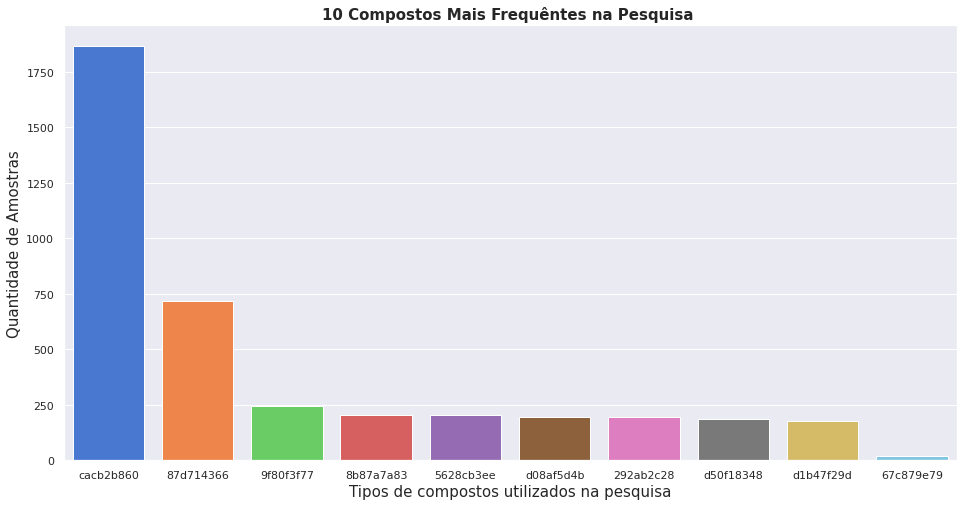

In [ ]:
plt.figure(figsize=(16, 8)) # Tamanho da Figura

ax = sns.countplot(
                   data = dados.query('composto in @cod_compostos'),
                   x = 'composto',
                   order = cod_compostos,
                   saturation = 1
                   ) # Configurações principais do gráfico

# Estilo da palavras
ax.set_title('10 Compostos Mais Frequêntes na Pesquisa ', size=15, weight='bold')
ax.set_xlabel('Tipos de compostos utilizados na pesquisa', size=15)
ax.set_ylabel('Quantidade de Amostras', size=15)
plt.show()

**Interpretação dos Dados**
* Percebe-se que o componente "cacb2b860" é o mais frequênte (composto do controle, como evidenciado na Aula 01)
* O composto "87d714366" é o segundo mais frequênnte, com menos da metade da quantidade de amostras do primeiro
* Existem outros 7 compostos com pouco mesnos de 250 amostras (menos que a metade do segundo)
* A partir do 10º, cai bastante a quantidade de amostras por composto, talvez por serem menos relevantes para a pesquisa ou porque possuem efeitos mesnos raros que exigiriam mais dados para serem observados

### Desafio 03: Plotar os histogramas com seaborn

* Podeser utilizar "sns.histplot?" para consultar a documentação da função dentro do notebook. 

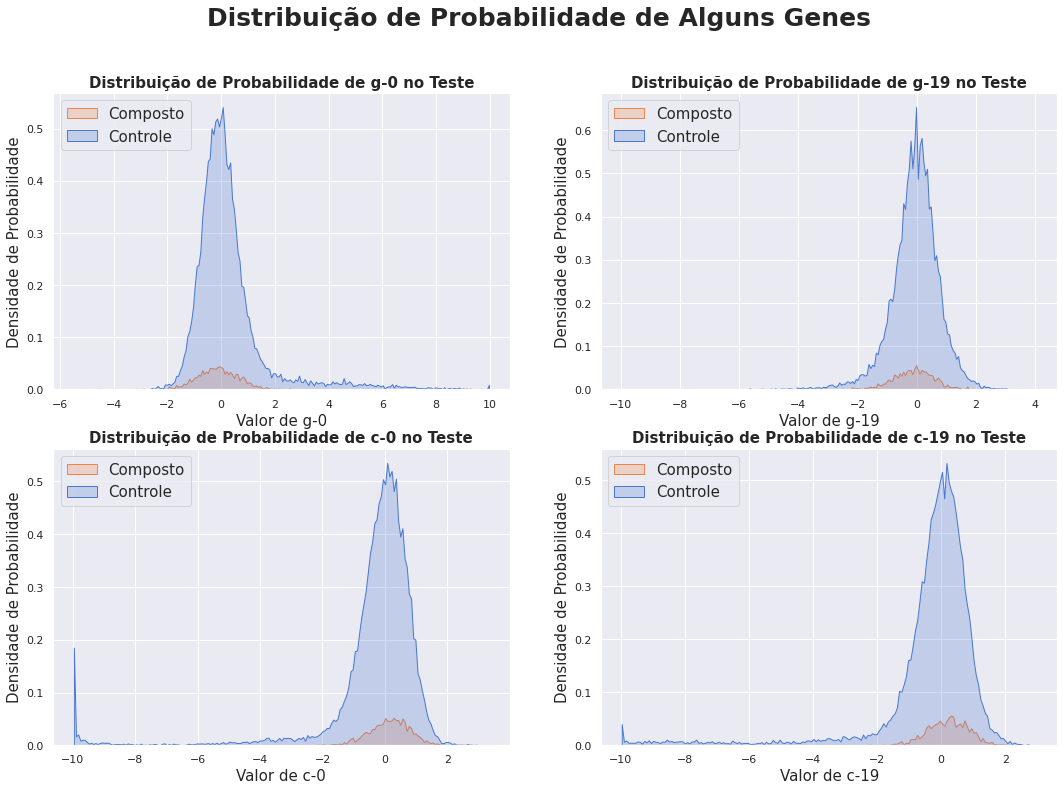

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(18, 12)) # Tamanho da Figura

################################################################################
ax[0,0] = sns.histplot(
                  data = dados,
                  x = 'g0',
                  hue = 'tratamento',
                  element ='poly',
                  stat = 'density',
                  ax=ax[0,0]
                  ) # Configurações principais do gráfico

# Estilo da palavras
ax[0,0].set_title('Distribuição de Probabilidade de g-0 no Teste', size=15, weight='bold')
ax[0,0].set_xlabel('Valor de g-0', size=15)
ax[0,0].set_ylabel('Densidade de Probabilidade', size=15)
ax[0,0].legend(['Composto', 'Controle'], fontsize=15, loc='upper left')

################################################################################
ax[0,1] = sns.histplot(
                  data = dados,
                  x = 'g19',
                  hue = 'tratamento',
                  element ='poly',
                  stat = 'density',
                  ax=ax[0,1]
                  ) # Configurações principais do gráfico

# Estilo da palavras
ax[0,1].set_title('Distribuição de Probabilidade de g-19 no Teste', size=15, weight='bold')
ax[0,1].set_xlabel('Valor de g-19', size=15)
ax[0,1].set_ylabel('Densidade de Probabilidade', size=15)
ax[0,1].legend(['Composto', 'Controle'], fontsize=15,loc='upper left')

################################################################################
ax[1,0] = sns.histplot(
                  data = dados,
                  x = 'c0',
                  hue = 'tratamento',
                  element ='poly',
                  stat = 'density',
                  ax=ax[1,0]
                  ) # Configurações principais do gráfico

# Estilo da palavras
ax[1,0].set_title('Distribuição de Probabilidade de c-0 no Teste', size=15, weight='bold')
ax[1,0].set_xlabel('Valor de c-0', size=15)
ax[1,0].set_ylabel('Densidade de Probabilidade', size=15)
ax[1,0].legend(['Composto', 'Controle'], fontsize=15, loc='upper left')

################################################################################
ax[1,1] = sns.histplot(
                  data = dados,
                  x = 'c19',
                  hue = 'tratamento',
                  element ='poly',
                  stat = 'density',
                  ax=ax[1,1]
                  ) # Configurações principais do gráfico

# Estilo da palavras
ax[1,1].set_title('Distribuição de Probabilidade de c-19 no Teste', size=15, weight='bold')
ax[1,1].set_xlabel('Valor de c-19', size=15)
ax[1,1].set_ylabel('Densidade de Probabilidade', size=15)
ax[1,1].legend(['Composto', 'Controle'], fontsize=15, loc='upper left')

plt.suptitle('Distribuição de Probabilidade de Alguns Genes', size=25, weight='bold')
plt.show()

Os quadtro gráficos representam a densidade de probabilidade (área abaixo do gráfico soma 1) para alguns genes.

Alguns parâmetros mais relevantes do histograma:
* hue = 'tratamento': diferencia a distribuição da variável pelo critério de controle e utilizando o composto
* element ='poly': torna a representação dos dados com uma curva, para o caso de variáveis contínuas
* stat = 'density': normaliza contagens de modo que a área do histograma seja 1

In [ ]:
from scipy import stats

In [ ]:
stats.normaltest(dados['g0']) # Teste de Normalidade; se p > 0.05, é normal

NormaltestResult(statistic=14433.858441024302, pvalue=0.0)

In [ ]:
stats.kruskal(dados.query('tratamento == "com_controle"')['g0'], dados.query('tratamento == "com_droga"')['g0']) # Teste de Variância (Distribuição); se p > 0.05, é significativamente igual

KruskalResult(statistic=73.84467684850325, pvalue=8.451200251178696e-18)

Analisando alguns elementos que compõem os genes observados, pode-se tomar algumas hipóteses genéricas.

* O valor associado a cada gene parece ter distribuições diferentes, mas geralmente centradas em 0 ou próximas disso (provavelmente intencional resultado de algunm tratamento estatístico)
* A contribuição dos dados controle comparados com os dados dos componentes testes é menor, o que é esperado visto a prop. entre esses dados (discutido na Aula 01)
* Os dados com controle e de componentes do teste tem a mesma distribuição (com a distorção ocorrendo apenas pelo volume de dados) ou distribuição diferente média e desvio padrão significativamente diferentes. Isso exige o uso testes estatísticos como paramétricos ou não-paramétricos (caso não haja uma distribuição que seja significante)


Referências

* Teste de Normalidade: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
* Teste não-paramétrico: https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

### Desafio 04: Estudar sobre as estatíticas retornadas no .describe()

A função .describe() do pacote Pandas agrega um conjunto de estatísticas descritivas de têndência central e dispersão. A função em mais detalhes pode ser em https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html ou por meio do código "pd.DataFrame.describe?" no notebook. A função funcina somente para variáveis numéricas.

As principais estísticas são:
* count: quantidade de dados encontrada; frequência absoluta
* mean: média, considerando a soma dos dados dividido pela quantidade de dados
* std: desvio padrão, considerando a distância média dos valores em relação à média
* min: valor mínimo encontrado
* 25%: 1 quartil, valor que separa os 25% dos menores dos 75% dos dados maiores
* 50%: 2 quartil, valor que separa os 50% dos menores dos 50% dos dados maiores; conhecido também como mediana
* 75%: 3 quartil, valor que separa os 75% dos menores dos 25% dos dados maiores
* max: valor máximo encontrado

In [ ]:
dados.describe()

,tempo,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950,-0.513775,-0.272200,-0.488675,-0.524600,-0.538900,-0.440375,-0.

### Desafio 05: Refletir sobre a manipulação do tamanho das visualizações. 

Visualização de Dados consiste em utilizar representações gráficos de informações e dados a fim de torná-los mais intuitios e compreensíveis. Esse objetivo passa por compreender a função de cada tipo de gráfico e como esse favorece (ou não a visualização de dados).

Os dados contam uma história na qual é possível (quando bem feito) sucitar como aqueles dados foram produzidos, o que levou àquela configuração específica e portanto tomar conclusões. Isso pode não ocorrer na medida em que se utiliza escalas complexas, formatos distorcidos, mais de dois eixos (3 eixos e gráficos 3D) que podem dificultar ou favorecer interpretações incorretas.

Visualizações também devem adequar-se ao público alvo pois as pessoas utilizam seus conhecimentos prévios para interpretar a realidade. Diferentes graus de instrução, conhecimento técnico e experiência podem facilitar ou dificultar a leitura, provocando adaptações para cada área.

Referências: https://bixtecnologia.com/5-maiores-erros-de-visualizacao-de-dados/

Exemplo:

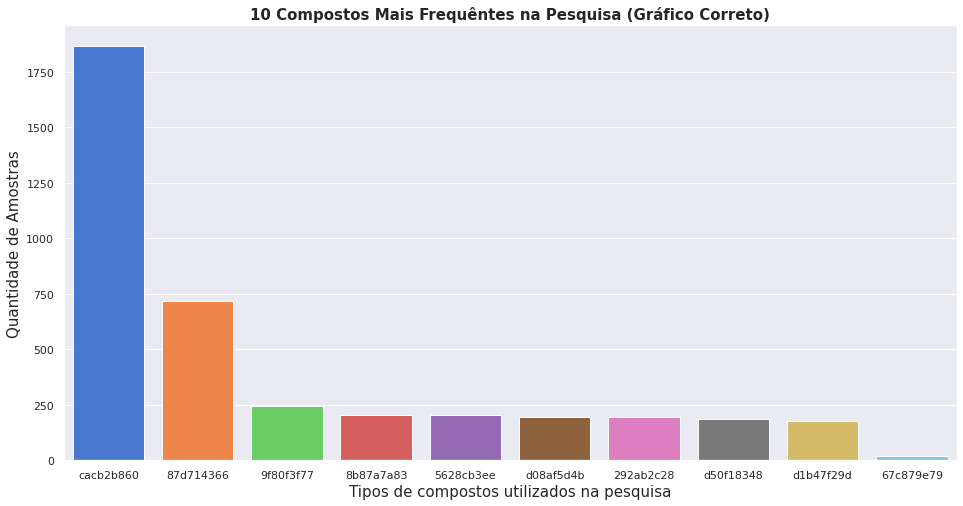

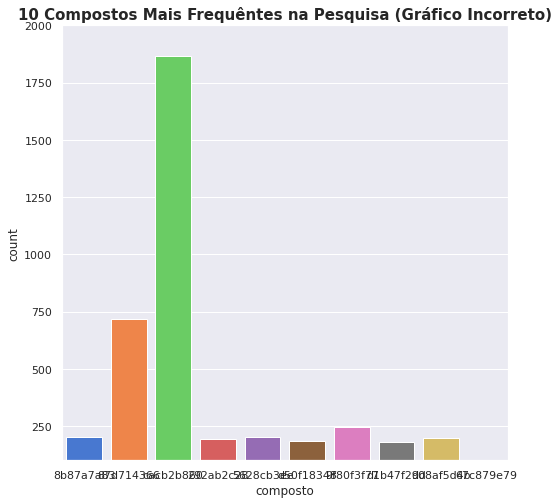

In [ ]:
plt.figure(figsize=(16, 8)) # Tamanho da Figura

ax = sns.countplot(
                   data = dados.query('composto in @cod_compostos'),
                   x = 'composto',
                   order = cod_compostos,
                   saturation = 1
                   ) # Configurações principais do gráfico

# Estilo da palavras
ax.set_title('10 Compostos Mais Frequêntes na Pesquisa (Gráfico Correto)', size=15, weight='bold')
ax.set_xlabel('Tipos de compostos utilizados na pesquisa', size=15)
ax.set_ylabel('Quantidade de Amostras', size=15)

plt.figure(figsize=(8, 8))
ax = sns.countplot(
                   data = dados.query('composto in @cod_compostos'),
                   x = 'composto',
                   saturation = 1
                   ) # Configurações principais do gráfico

# Estilo da palavras
ax.set_title('10 Compostos Mais Frequêntes na Pesquisa (Gráfico Incorreto)', size=15, weight='bold')
plt.ylim([100, 2000])
plt.show()

Gráfico Incorreto:
* Gráfico não inicia em 0 mas não informa isso (ainda se informasse distorçe a percepção do leitor)
* Gráficos não seguem uma ordem lógica (crescente, decrescente, alfabética)
* Rótulos em x estão sobrepostos e ilegíveis
* Nome do eixo não simplifica o entendimento do eixo


### Desafio 06: Fazer outras análises com o boxplot e até com o histograma. 

In [ ]:
dados['g0'].describe()

count    23814.000000
mean         0.248366
std          1.393399
min         -5.513000
25%         -0.473075
50%         -0.008850
75%          0.525700
max         10.000000
Name: g0, dtype: float64

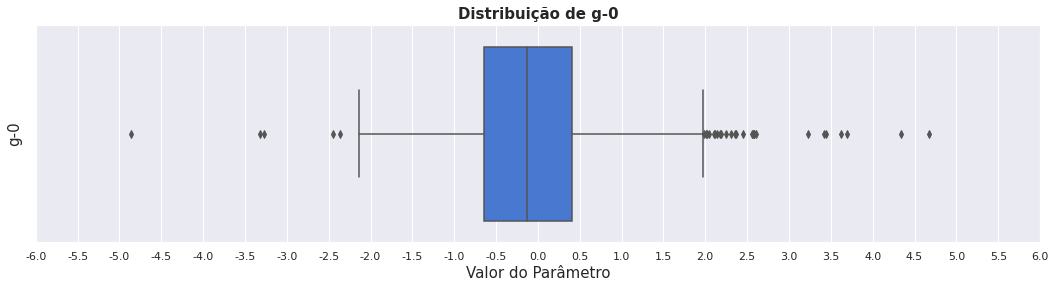

In [ ]:
plt.figure(figsize=(18, 4)) # Tamanho da Figura

ax = sns.boxplot(
                 data=dados.query('tratamento == "com_controle"'),
                 x='g0',
                 saturation = 1
                 ) # Configurações principais do gráfico

# Estilo da palavras
ax.set_title('Distribuição de g-0', size=15, weight='bold')
ax.set_ylabel('g-0', size=15)
ax.set_xlabel('Valor do Parâmetro', size=15)
plt.xticks([i/10 for i in range(-60, 61, 5)],[i/10 for i in range(-60, 61, 5)])
plt.show()

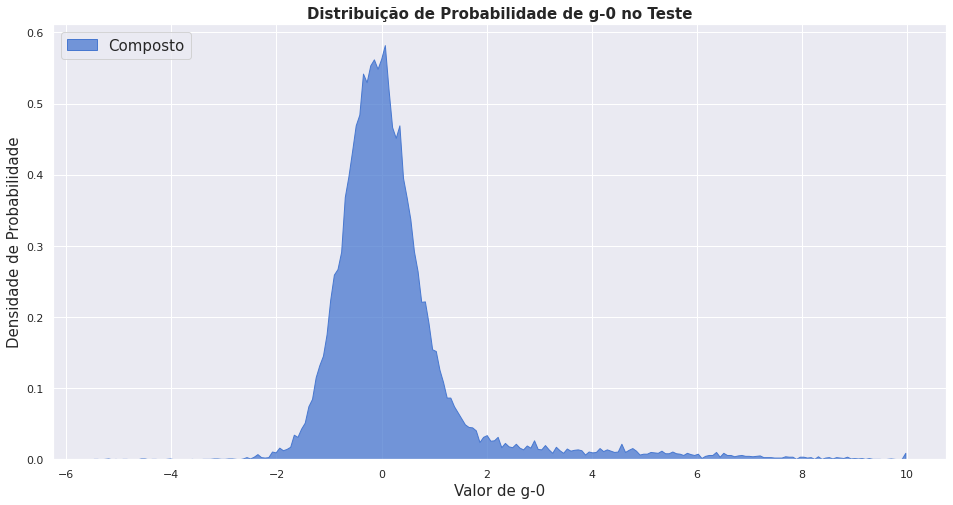

In [ ]:
plt.figure(figsize=(16, 8)) # Tamanho da Figura

ax = sns.histplot(
                  data = dados,
                  x = 'g0',
                  element ='poly',
                  stat = 'density'
                  ) # Configurações principais do gráfico

# Estilo da palavras
ax.set_title('Distribuição de Probabilidade de g-0 no Teste', size=15, weight='bold')
ax.set_xlabel('Valor de g-0', size=15)
ax.set_ylabel('Densidade de Probabilidade', size=15)
ax.legend(['Composto', 'Controle'], fontsize=15, loc='upper left')
plt.show()

Valores do perceitis extratídos pela função já abordada .describe e que representa-se graficamente pelo boxplot. Os limites no formato de T na horizontal delimitam o início dos valores extremos (outliers).

* 25%: -0.473075
* 50%: -0.008850
* 75%: 0.525700

Comparado ao histograma, o boxplot explícita as categorias (percentis), o que permite a quem lê o gráfico perceber essa proporcionalidade, enquanto o histograma transmite melhor a dimensão de onde estão mais os dados, a concentração principal (moda).

### Desafio 07: Resumo do que você aprendeu com os dados

* Conheci melhor a distribuição dos tipo "g" e "c", observando valores centrais, percentis, assimetrias a uma possível distribuição dos dados
  * Percebe-se que o componente "cacb2b860" é o mais frequênte (composto do controle, como evidenciado na Aula 01)
  * O composto "87d714366" é o segundo mais frequênnte, com menos da metade da quantidade de amostras do primeiro
  * Existem outros 7 compostos com pouco mesnos de 250 amostras (menos que a metade do segundo)
* Há distribuições diferentes entre os valores dos parâmetros comparando os compostos de controle e de teste
  * Parecem estar centradas em 0 ou próximas disso (provavelmente intencional resultado de algunm tratamento estatístico)
  * A contribuição dos dados controle comparados com os dados dos componentes testes é menor, o que é esperado visto a prop. entre esses dados (discutido na Aula 01)
  * Os dados com controle e de componentes do teste tem a mesma distribuição (com a distorção ocorrendo apenas pelo volume de dados) ou distribuição diferente média e desvio padrão significativamente diferentes. Isso exige o uso testes estatísticos como paramétricos ou não-paramétricos (caso não haja uma distribuição que seja significante)
  * Os valores de "c" parecem ter valores extremamente outliers (ver gráficos do desafio 03)